In [2]:
# notebooks/eda.ipynb (or whatever notebook)
from datasets import load_dataset
import os
from pathlib import Path

# Get project root directory (parent of notebooks/)
project_root = Path.cwd().parent
data_dir = project_root / "data"

data_dir.mkdir(parents=True, exist_ok=True)

dataset = load_dataset("deepcopy/MathWriting-human")
dataset.save_to_disk(str(data_dir / "mathwriting"))

/Users/martinvu/HandTex/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Saving the dataset (1/1 shards): 100%|██████████| 15674/15674 [00:00<00:00, 57039.22 examples/s]


dict_keys(['image', 'latex', 'sample_id', 'split_tag', 'data_type'])
LaTeX: V(\tilde{\beta})
<class 'PIL.JpegImagePlugin.JpegImageFile'>


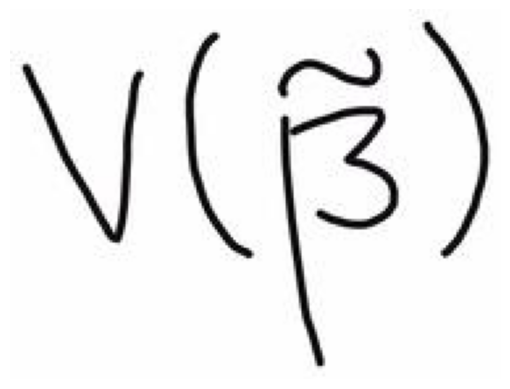

In [9]:
from datasets import load_from_disk
from pathlib import Path
import matplotlib.pyplot as plt

project_root = Path.cwd().parent
data_dir = project_root / "data" / "mathwriting"
ds = load_from_disk(str(data_dir))

sample = ds["train"][0]

print(sample.keys())
print("LaTeX:", sample["latex"][:100])

plt.imshow(sample["image"])
plt.axis("off")
print(type(sample["image"])) 

In [ ]:
from pathlib import Path
from datasets import load_from_disk
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

project_root = Path.cwd().parent
data_dir = project_root / "data" / "mathwriting"
ds = load_from_disk(str(data_dir))

ds_train = ds["train"].select(range(2000))

def preprocess_image(img, target_size=(128, 128)):
    img = img.convert("L")  # convert to grayscale
    img = img.resize(target_size)
    img = np.array(img) / 255.0  # normalize to [0, 1]
    return img

images, latex_strings = [], []
for sample in ds_train:
    img = preprocess_image(sample["image"])
    images.append(img)
    latex_strings.append(sample["latex"])
images = np.array(images)

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(latex_strings)  # map of words to ids
sequences = tokenizer.texts_to_sequences(latex_strings)  # assign ids to texts
padded_sequences = pad_sequences(sequences, padding="post")  # pad sequences to the same length

with open("latex_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)  # converts tokenizer to bytes and writes to file
images = images[..., np.newaxis]  # add channel dimension

print("images shape:", images.shape)
print("padded sequences shape:", padded_sequences.shape)

vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
print("vocab size:", vocab_size)

with open("vocab_size.txt", "w") as f:
    f.write(str(vocab_size))



images shape: (2000, 128, 128, 1)
padded sequences shape: (2000, 143)
vocab size: 62
